In [3]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')
import saiph

from metrics.privacy_metrics.dcr_nndr import get_dcr, get_nndr
from metrics.privacy_metrics.get_column_type import get_categorical_continuous

## AIDS

In [4]:
dcr_values = []
nndr_values = []
type = []
round_number = []

for i in range(10):
    train = pd.read_csv(f'/Users/morgan/Tech/avatar-paper/datasets/AIDS/privacy/holdout_{i}.csv').fillna(0)
    test = pd.read_csv(f'/Users/morgan/Tech/avatar-paper/datasets/AIDS/privacy/remaining_{i}.csv').fillna(0)
    avatar = pd.read_csv(f'/Users/morgan/Tech/avatar-paper/datasets/AIDS/privacy/avatar_{i}.csv').fillna(0)
    synthpop = pd.read_csv(f'/Users/morgan/Tech/avatar-paper/datasets/AIDS/privacy/synthpop_{i}.csv').fillna(0)
    synthpop = synthpop.drop(['Unnamed: 0'], axis=1)
    ctgan = pd.read_csv(f'/Users/morgan/Tech/avatar-paper/datasets/AIDS/privacy/ctgan_{i}.csv').fillna(0)

    # Get correct data types
    categorical_val, continuous_val = get_categorical_continuous(train)
    train[categorical_val] = train[categorical_val].astype("category")
    test[categorical_val] = test[categorical_val].astype("category")
    avatar[categorical_val] = avatar[categorical_val].astype("category")
    synthpop[categorical_val] = synthpop[categorical_val].astype("category")
    ctgan[categorical_val] = ctgan[categorical_val].astype("category")
    
    train_coord, model = saiph.fit_transform(train)
    test_coord = saiph.transform(test, model)
    avatar_coord = saiph.transform(avatar, model)
    synthpop_coord = saiph.transform(synthpop, model)
    ctgan_coord = saiph.transform(ctgan, model)

    ref_dcr = get_dcr(train_coord, test_coord)
    ref_dcr = [item[0] for item in [l.tolist() for l in ref_dcr]]
    ref_nndr = get_nndr(train_coord, test_coord)

    avatar_dcr = get_dcr(train_coord, avatar_coord)
    avatar_dcr = [item[0] for item in [l.tolist() for l in avatar_dcr]]
    avatar_nndr = get_nndr(train_coord, avatar_coord)

    synthpop_dcr = get_dcr(train_coord, synthpop_coord)
    synthpop_dcr = [item[0] for item in [l.tolist() for l in synthpop_dcr]]
    synthpop_nndr = get_nndr(train_coord, synthpop_coord)

    ctgan_dcr = get_dcr(train_coord, ctgan_coord)
    ctgan_dcr = [item[0] for item in [l.tolist() for l in ctgan_dcr]]
    ctgan_nndr = get_nndr(train_coord, ctgan_coord)

    dcr_values = dcr_values+ref_dcr+avatar_dcr+synthpop_dcr+ctgan_dcr
    nndr_values = nndr_values+list(ref_nndr)+list(avatar_nndr)+list(synthpop_nndr)+list(ctgan_nndr)
    type_value = np.array(['Reference', 'Avatar', 'Synthpop', 'CT-GAN'])
    round_type = np.repeat(type_value, [len(ref_dcr), len(avatar_dcr), len(synthpop_dcr), len(ctgan_dcr)])
    type = type+list(round_type)
    round_number = round_number+list(np.repeat(np.array([f'round_{i}']), len(round_type)))
    
results_aids = pd.DataFrame(zip(dcr_values, nndr_values, type, round_number), columns=['dcr_values', 'nndr_values', 'type', 'round'])
results_aids.to_csv('/Users/morgan/Tech/avatar-paper/datasets/results_df/AIDS_DCR_NNDR_comparison_results.csv',index=False)


## WBCD

In [5]:
dcr_values = []
nndr_values = []
type = []
round_number = []

for i in range(10):
    train = pd.read_csv(f'/Users/morgan/Tech/avatar-paper/datasets/WBCD/privacy/holdout_{i}.csv').fillna(0)
    test = pd.read_csv(f'/Users/morgan/Tech/avatar-paper/datasets/WBCD/privacy/remaining_{i}.csv').fillna(0)
    avatar = pd.read_csv(f'/Users/morgan/Tech/avatar-paper/datasets/WBCD/privacy/avatar_{i}.csv').fillna(0)
    synthpop = pd.read_csv(f'/Users/morgan/Tech/avatar-paper/datasets/WBCD/privacy/synthpop_{i}.csv').fillna(0)
    synthpop = synthpop.drop(['Unnamed: 0'], axis=1)
    ctgan = pd.read_csv(f'/Users/morgan/Tech/avatar-paper/datasets/WBCD/privacy/ctgan_{i}.csv').fillna(0)

    # Get correct data types
    categorical_val = ['Class']
    continuous_val = ['Clump_Thickness', 'Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
        'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
        'Normal_Nucleoli', 'Mitoses']
    train[categorical_val] = train[categorical_val].astype("category")
    test[categorical_val] = test[categorical_val].astype("category")
    avatar[categorical_val] = avatar[categorical_val].astype("category")
    synthpop[categorical_val] = synthpop[categorical_val].astype("category")
    ctgan[categorical_val] = ctgan[categorical_val].astype("category")
    
    train_coord, model = saiph.fit_transform(train)
    test_coord = saiph.transform(test, model)
    avatar_coord = saiph.transform(avatar, model)
    synthpop_coord = saiph.transform(synthpop, model)
    ctgan_coord = saiph.transform(ctgan, model)

    ref_dcr = get_dcr(train_coord, test_coord)
    ref_dcr = [item[0] for item in [l.tolist() for l in ref_dcr]]
    ref_nndr = get_nndr(train_coord, test_coord)

    avatar_dcr = get_dcr(train_coord, avatar_coord)
    avatar_dcr = [item[0] for item in [l.tolist() for l in avatar_dcr]]
    avatar_nndr = get_nndr(train_coord, avatar_coord)

    synthpop_dcr = get_dcr(train_coord, synthpop_coord)
    synthpop_dcr = [item[0] for item in [l.tolist() for l in synthpop_dcr]]
    synthpop_nndr = get_nndr(train_coord, synthpop_coord)

    ctgan_dcr = get_dcr(train_coord, ctgan_coord)
    ctgan_dcr = [item[0] for item in [l.tolist() for l in ctgan_dcr]]
    ctgan_nndr = get_nndr(train_coord, ctgan_coord)

    dcr_values = dcr_values+ref_dcr+avatar_dcr+synthpop_dcr+ctgan_dcr
    nndr_values = nndr_values+list(ref_nndr)+list(avatar_nndr)+list(synthpop_nndr)+list(ctgan_nndr)
    type_value = np.array(['Reference', 'Avatar', 'Synthpop', 'CT-GAN'])
    round_type = np.repeat(type_value, [len(ref_dcr), len(avatar_dcr), len(synthpop_dcr), len(ctgan_dcr)])
    type = type+list(round_type)
    round_number = round_number+list(np.repeat(np.array([f'round_{i}']), len(round_type)))
    
results_wbcd = pd.DataFrame(zip(dcr_values, nndr_values, type, round_number), columns=['dcr_values', 'nndr_values', 'type', 'round'])
results_wbcd.to_csv('/Users/morgan/Tech/avatar-paper/datasets/results_df/WBCD_DCR_NNDR_comparison_results.csv',index=False)



<AxesSubplot: xlabel='nndr_values', ylabel='type'>

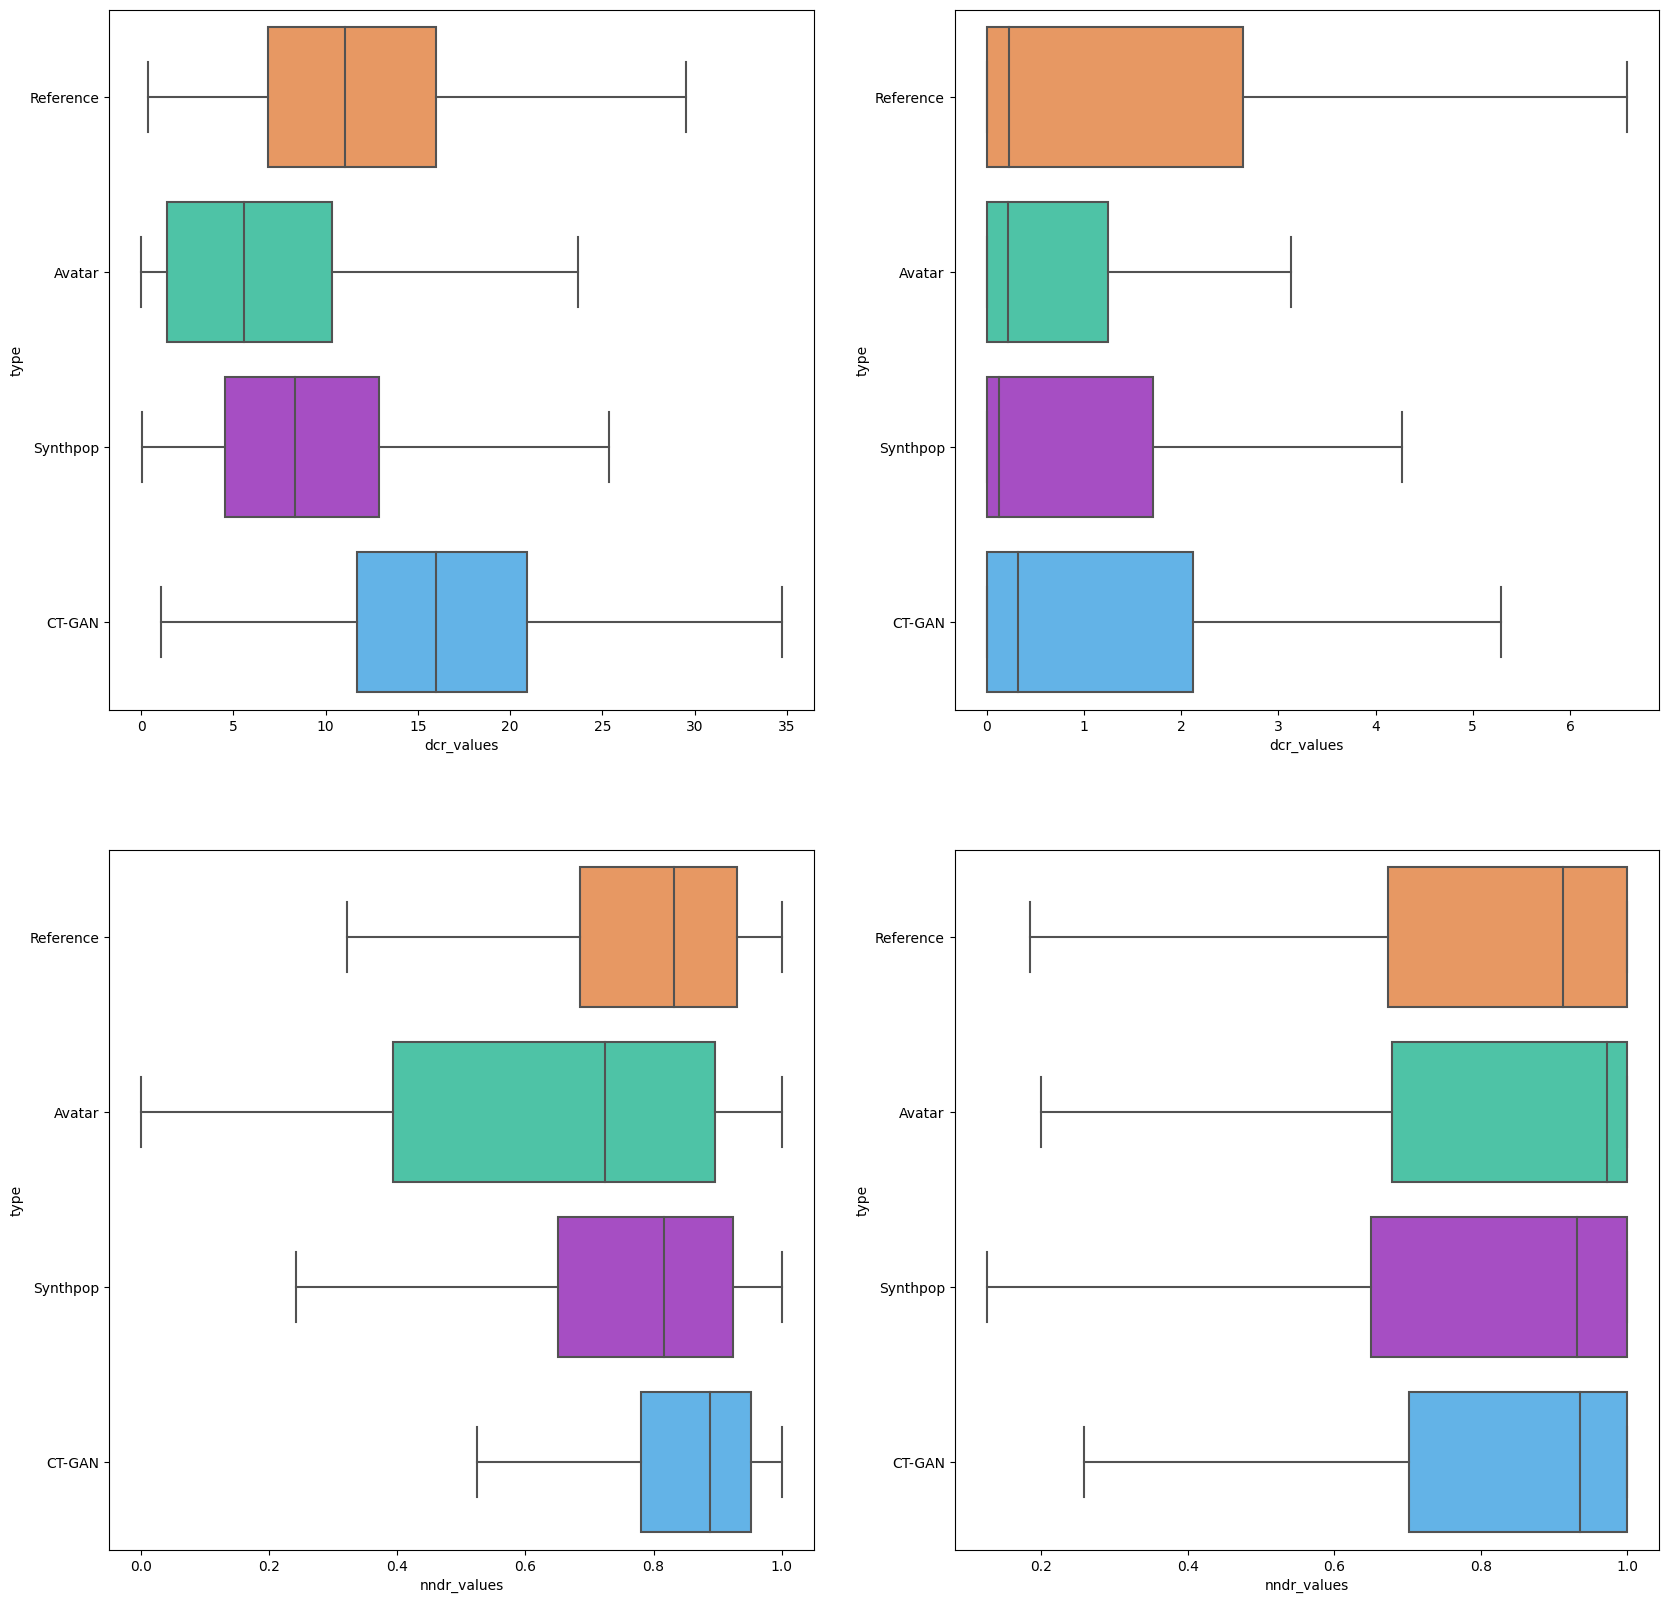

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(20,20))
color_dict = {'Reference': '#fd934d' , 'Avatar' : '#3bd6b0', 'Synthpop' : '#b03bd6', 'CT-GAN' : '#4db7fd'}

sns.boxplot(data=results_aids, x="dcr_values", y="type", ax = axes[0,0], palette = color_dict, showfliers = False)
sns.boxplot(data=results_aids, x="nndr_values", y="type", ax = axes[1,0], palette = color_dict, showfliers = False)
sns.boxplot(data=results_wbcd, x="dcr_values", y="type", ax = axes[0,1], palette = color_dict, showfliers = False)
sns.boxplot(data=results_wbcd, x="nndr_values", y="type", ax = axes[1,1], palette = color_dict, showfliers = False)